<a href="https://colab.research.google.com/github/joeyMckinney/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/josiah_mckinney_LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
# Read New York City apartment rental listing data
import pandas as pd
#made the created column a datetime object
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv', parse_dates=['created'])
assert df.shape == (49352, 34)

In [ ]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [ ]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   bathrooms             48818 non-null  float64       
 1   bedrooms              48818 non-null  int64         
 2   created               48818 non-null  datetime64[ns]
 3   description           47393 non-null  object        
 4   display_address       48685 non-null  object        
 5   latitude              48818 non-null  float64       
 6   longitude             48818 non-null  float64       
 7   price                 48818 non-null  int64         
 8   street_address        48808 non-null  object        
 9   interest_level        48818 non-null  object        
 10  elevator              48818 non-null  int64         
 11  cats_allowed          48818 non-null  int64         
 12  hardwood_floors       48818 non-null  int64         
 13  dogs_allowed    

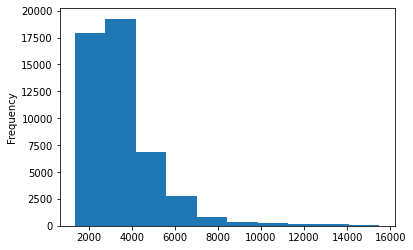

In [ ]:
#ploting price
df['price'].plot(kind='hist')

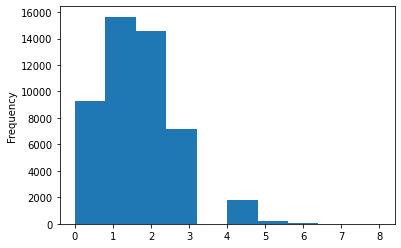

In [ ]:
#ploting bedrooms
df['bedrooms'].plot(kind='hist')

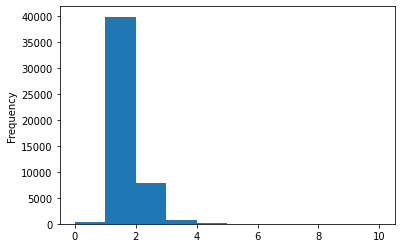

In [ ]:
#ploting bathrooms
df['bathrooms'].plot(kind='hist')

In [ ]:
#Spliting the data
#making the feature matrix
X = df[['bedrooms', 'created']]

In [ ]:
X

,bedrooms,created
0,3,2016-06-24 07:54:24
1,2,2016-06-12 12:19:27
2,1,2016-04-17 03:26:41
3,1,2016-04-18 02:22:02
4,4,2016-04-28 01:32:41
...,...,...
49347,2,2016-06-02 05:41:05
49348,1,2016-04-04 18:22:34
49349,1,2016-04-16 02:13:40
49350,0,2016-04-08 02:13:33


In [ ]:
#making the target vector
y = df[['price', 'created']]

In [ ]:
y.head()

,price,created
0,3000,2016-06-24 07:54:24
1,5465,2016-06-12 12:19:27
2,2850,2016-04-17 03:26:41
3,3275,2016-04-18 02:22:02
4,3350,2016-04-28 01:32:41


In [ ]:
#train-validation split
#finding the earliest date
df['created'].min()

Timestamp('2016-04-01 22:12:41')

In [ ]:
#finding the latiest date
df['created'].max()

Timestamp('2016-06-29 21:41:47')

In [ ]:
#april and june are going to be my training set and july my validation
cutoff = '2016-06-01'
mask = X.created < cutoff

X_train, y_train = X.loc[mask], y.loc[mask]
X_val, y_val = X.loc[~mask], y.loc[~mask]

In [ ]:
#checking work
print(X_train.shape)
print(X_val.shape)

(31844, 2)
(16974, 2)


In [ ]:
#setting the date as the index for all arrarys
y_train2 = y_train.set_index('created')
y_val2 = y_val.set_index('created')
X_train2 = X_train.set_index('created')
X_val2 = X_val.set_index('created')

In [ ]:
#establishing baseline
baseline_guess = y_train2.mean()

MAE = abs(y_train2 - baseline_guess).mean()

In [ ]:
#building model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

model = lr.fit(X_train2, y_train2);

In [ ]:
#finding the coefficient. which is used to find the slope for our line of best fit.
coef1 = lr.coef_[0]

In [ ]:
#this is where our line intercepts the Y axis
inter1 = lr.intercept_

In [ ]:
coef1

array([855.50602603])

In [ ]:
inter1

array([2268.08539188])

In [ ]:
X_train2

,bedrooms
created,
2016-04-17 03:26:41,1
2016-04-18 02:22:02,1
2016-04-28 01:32:41,4
2016-04-19 04:24:47,4
2016-04-27 03:19:56,2
...,...
2016-04-22 15:44:11,1
2016-04-04 18:22:34,1
2016-04-16 02:13:40,1


In [ ]:
prediction = model.predict(X_val2)

the model coefficient is when you use two samples of data, where one is a feature and the other is the target, to get the Y intercept and slope. resluting in the formula to make predictions. in or example that would be cprf1 and inter1